In [1]:
from maelzel import distribute
import importlib
import bpf4
from emlib import mathlib

In [2]:
import matplotlib.pyplot as plt


In [3]:
plt.style.use('seaborn')

In [5]:
ys = distribute.ditherCurve(c, 40, resolution=3)
print(ys, len(ys))

NameError: name 'c' is not defined

In [4]:
bpf4.core.Sampled(ys, 1, interpolation='nointerpol').plot(kind='bar')

NameError: name 'ys' is not defined

In [29]:
c2 = bpf4.core.Sampled(ys, 1, interpolation='nointerpol')

In [ ]:
c2[::0.1].plot()

In [1]:
import bpf4
from maelzel import distribute
import matplotlib.pyplot as plt


In [2]:
c = bpf4.core.Sampled([0, 2, 1, 3, 2, 4], dx=1, interpolation='expon(2.5)')

In [6]:
c.map(20)

array([0., 0., 0., 0., 2., 2., 2., 2., 1., 1., 1., 1., 3., 3., 3., 3., 2.,
       2., 2., 4.])

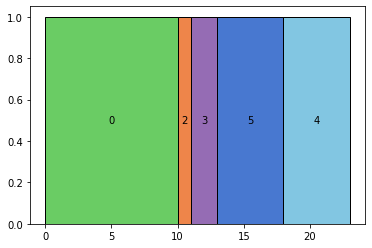

In [5]:
sections = [0, 10, 11, 13, 18]
ids =      [0, 2,   3,  5,  4]
distribute.plotFrames(sections, ids)

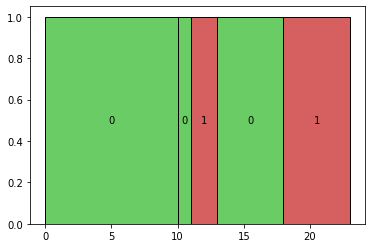

<AxesSubplot:>

In [3]:

    >>> from maelzel.distribute import *
    >>> sections = [0, 10, 11, 13, 18]
    >>> ids =      [0, 0,   1,  0,  1]
    >>> plotFrames(sections, ids)

<BarContainer object of 3 artists>

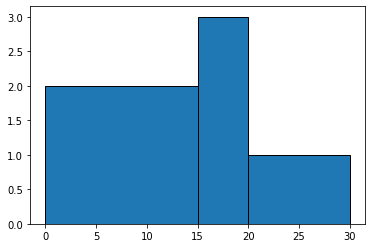

In [5]:
xs = [0, 15, 20]
widths = [15, 5, 10]
xs2 = [x + w/2 for x, w in zip(xs, widths)]
plt.bar(xs2, height=[2, 3, 1], width=widths, edgecolor='black')

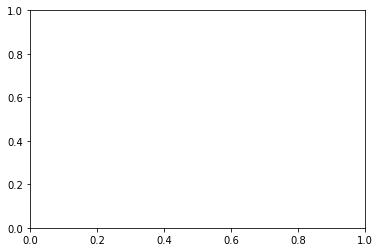

In [3]:
f, ax = plt.subplots()

In [14]:
import bpf4
from maelzel.distribute import dohndt
numvoices = 8
numchannels = 4
weightperchannel = bpf4.linear(0, 3, 1, 1).map(numchannels)
assigned = dohndt(numvoices, weightperchannel)
assigned

[3, 2, 2, 1]

In [15]:
import bpf4
from maelzel.distribute import dohndt
numitems = 10
numstreams = 4
weights = [10, 6, 5, 3]
assigned = dohndt(numitems, weights)
assigned

[4, 3, 2, 1]

In [14]:
from maelzel import distribute
from emlib.iterlib import pairwise
import matplotlib.pyplot as plt
parts = distribute.partitionExpon(40, 5, exp=3)
parts

array([ 6.0952381 ,  6.19047619,  6.85714286,  8.66666667, 12.19047619])

In [17]:
round(sum(parts))

40

In [20]:
intparts = distribute.roundSeqPreservingSum(parts, maxsolutions=10)
print(f"{intparts}\nSum: {sum(intparts)}")
        

[6, 6, 7, 8, 13]
Sum: 40


<StemContainer object of 3 artists>

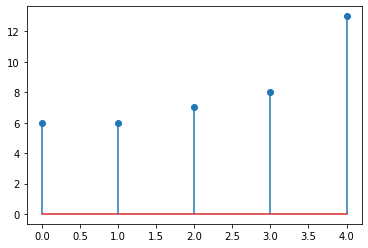

In [16]:
plt.stem(parts2)

In [27]:
from maelzel import distribute
distribute.onepulse(0.5, 5, entropy=0)
        

[1, 0, 1, 1, 0]

In [1]:
from maelzel import distribute
A = ["A", "B", "C"]
B = ["a", "b", "c", "d", "e"]
distribute.interleave(A, B)
"".join(distribute.interleave(A, B))

'aAbcBdCe'

In [2]:
distribute.fill([1,2.5, 5], [3, 4])

_FillResult(matches=[_FillMatch(size=0.5, containerIdx=0, streamIdx=0), _FillMatch(size=2.5, containerIdx=1, streamIdx=0), _FillMatch(size=4, containerIdx=2, streamIdx=1)], unfilledContainers=[0.5, 0.0, 1], unusedStreams=[0.0, 0])

In [4]:
distribute.chooseBestDistribution([0, 0.1, 0.3, 0.5, 1, 2, 3], [0.1, 0.2, 0.35])

[0.1, 0.1, 0.2, 0.35, 0.35, 0.35, 0.35]

In [7]:
import bpf4
from maelzel import distribute
A = "AAAAAAAAAAAAAAAAAAA"
B = "BBBBBBBBBBBBB"
C = "CCCCC"
D = "DDD"

streams = (A, B, C, D)
streamSizes = (len(A), len(B), len(C), len(D))
bpfs = (bpf4.linear(0, 1, 1, 1),     # bpfs must be defined within the unity
        bpf4.halfcos(0, 0, 0.5, 1, 1, 0),
        bpf4.linear(0, 1, 1, 0),
        bpf4.expon(0, 0, 1, 1, exp=3)
)

In [8]:
distributedItems = distribute.distributeWeightedStreams(streamSizes, bpfs)

In [10]:
for stream, idx in distributedItems:
    print(streams[stream][idx], end='')

ACAACABABCABABABCABBABABABDBACABABADAADA

In [13]:
from fractions import Fraction
import math

In [17]:
pifraction = Fraction.from_float(math.pi)
pifraction

Fraction(884279719003555, 281474976710656)

In [15]:
from maelzel.rational import Rat

In [18]:
pirat = Rat.from_float(math.pi)
pirat

3.1415927

In [19]:
pirat == pifraction

True

In [25]:
isinstance(pirat, numbers.Rational)

True

In [22]:
import numbers

In [23]:
numbers.Rational

numbers.Rational

In [24]:
isinstance(pirat, numbers.Rational)

True

In [12]:
from maelzel.scoring import util
from emlib.mathlib import frange

In [3]:
util.nextInGrid(0.34, [0.25, 1/3])

0.5

In [28]:
a == pirat

True

In [15]:
for x in frange(60, 61, 0.05):
    print(x, util.centsDeviation(x, divsPerSemitone=4), util.centsDeviation(x, divsPerSemitone=2))

60.0 0 0
60.05 5 5
60.1 10 10
60.15 15 15
60.2 20 20
60.25 25 25
60.3 30 30
60.35 35 35
60.4 40 40
60.45 45 45
60.5 50 50
60.55 55 55
60.6 60 60
60.65 -35 65
60.7 -30 70
60.75 -25 -25
60.8 -20 -20
60.85 -15 -15
60.9 -10 -10
60.95 -5 -5


In [1]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
 

In [2]:
scorestruct = ScoreStruct('''
4/4, 80
3/4
3/4
5/8, 60
7/8
4/4
...
''')
scorestruct

Meas. Index,Timesig,Tempo (quarter note),Label
0,4/4,80,
1,3/4,,
2,3/4,,
3,5/8,60,
4,7/8,,
5,4/4,,
...,,,


In [3]:
notes = [
    (0.5, "4C"),
    (1.5, "4C+"),
    (1/3, "4D-25"),
    (2/3, "4E+25"),
    (2+1/5, "4F#+"),
    (5.8, "4A-10")
]
notations = [scoring.Notation(dur, [p]) for dur, p in notes]
notations

[«None, dur=0.500 4C»,
 «None, dur=1.500 4C+»,
 «None, dur=0.333 4D-25»,
 «None, dur=0.667 4E+25»,
 «None, dur=2.200 4F#+»,
 «None, dur=5.800 4A-10»]

In [4]:
part = scoring.Part(notations)
qscore = scoring.quant.quantize([part], struct=scorestruct)
qscore.parts[0].dump()


Timesig: 4/4 (quarter=80)
  Ratio (1, 1)
    «0.000:0.500 4C»
    «0.500:2.000 4C+»
  Ratio (3, 2)
    «2.000:2.333 3/2 4D-25»
    «2.333:3.000 3/2 4E+25»
  Ratio (1, 1)
    «3.000:4.000 tiedNext 4F#+»
Timesig: 3/4 (quarter=80)
  Ratio (1, 1)
    «0.000:1.000 tiedPrev tiedNext 4F#+»
  Ratio (5, 4)
    «1.000:1.200 5/4 tiedPrev 4F#+»
    «1.200:2.000 5/4 tiedNext 4A-10»
  Ratio (1, 1)
    «2.000:3.000 tiedPrev tiedNext 4A-10»
Timesig: 3/4 (quarter=80)
  Ratio (1, 1)
    «0.000:3.000 tiedPrev tiedNext 4A-10»
Timesig: 5/8 (quarter=60)
  Ratio (1, 1)
    «0.000:1.000 tiedPrev 4A-10»
  Ratio (1, 1)
    «1.000:2.500 rest»


In [5]:
renderopts = scoring.render.RenderOptions(showCents=True)

In [6]:
rendered = scoring.render.renderQuantizedScore(qscore, options=renderopts, backend='lilypond')

In [7]:
rendered.write("~/tmp/foo.pdf")

In [10]:
! zathura ~/tmp/foo.pdf

---------------------------


csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


Chain([4A#:468Hz:1♩:start=0, 4E:331Hz:1♩:start=1, 4F#:371Hz:1♩:start=2, 4D#:312Hz:1♩:start=3, 4F:350Hz:1♩:start=4, 4A:442Hz:1♩:start=5, 5D:589Hz:1♩:start=6, 5C#:556Hz:1♩:start=7, 4G:393Hz:1♩:start=8, 4G#:417Hz:1♩:start=9, …])
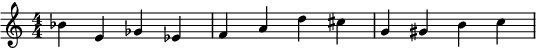

In [1]:
from maelzel.core import *
series = Chain("4Bb 4E 4F# 4Eb 4F 4A 5D 5C# 4G 4G# 4B 5C".split())
series
            

Chain([4A#:468Hz:1.5♩:start=0, 4E:331Hz:1.5♩:start=1.5, 4F#:371Hz:1.5♩:start=3, 4D#:312Hz:1.5♩:start=4.5, 4F:350Hz:1.5♩:start=6, 4A:442Hz:1.5♩:start=7.5, 5D:589Hz:1.5♩:start=9, 5C#:556Hz:1.5♩:start=10.5, 4G:393Hz:1.5♩:start=12, 4G#:417Hz:1.5♩:start=13.5, …])
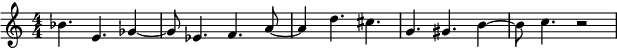

In [21]:
series.timeScale(factor=1.5)

Chain([4D:294Hz:1♩:start=0, 4G#:417Hz:1♩:start=1, 4F#:371Hz:1♩:start=2, 4A:442Hz:1♩:start=3, 4G:393Hz:1♩:start=4, 4D#:312Hz:1♩:start=5, 3A#:234Hz:1♩:start=6, 3B:248Hz:1♩:start=7, 4F:350Hz:1♩:start=8, 4E:331Hz:1♩:start=9, …])
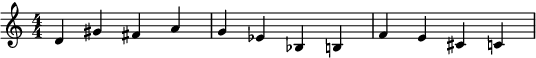

In [2]:
inv = series.invertPitch("4F#")
inv

In [3]:
' '.join([n.name for n in inv])

'4D 4G# 4F# 4A 4G 4D# 3A# 3B 4F 4E 4C# 4C'


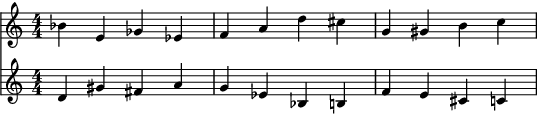

In [10]:
s = Score([series, inv])
s

In [20]:
print(" ".join(_.name.ljust(4) for _ in series))
print(" ".join(_.name.ljust(4) for _ in inv))


4A#  4E   4F#  4D#  4F   4A   5D   5C#  4G   4G#  4B   5C  
4D   4G#  4F#  4A   4G   4D#  3A#  3B   4F   4E   4C#  4C  


In [6]:
v0.attachedScoreStruct()

Voice([4D:294Hz:1♩:start=0, 4G#:417Hz:1♩:start=1, 4F#:371Hz:1♩:start=2, 4A:442Hz:1♩:start=3, 4G:393Hz:1♩:start=4, 4D#:312Hz:1♩:start=5, 3A#:234Hz:1♩:start=6, 3B:248Hz:1♩:start=7, 4F:350Hz:1♩:start=8, 4E:331Hz:1♩:start=9, 4C#:278Hz:1♩:start=10, 4C:262Hz:1♩:start=11])
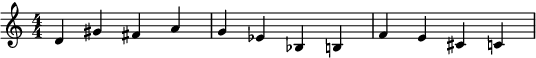

In [7]:
v1 = Voice(inv)
v1

In [12]:
set(v.attachedScoreStruct() for v in s.voices)

{None}

Chain([4F:350Hz:4♩:start=0, 4C:262Hz:4♩:start=4, 4F:350Hz:4♩:start=8, 4A:442Hz:4♩:start=12, Rest(dur=2), 4E:331Hz:2♩:start=18, 4F:350Hz:4♩:start=20, 4E:331Hz:2♩:start=24, 4C:262Hz:2♩:start=26, 4C:262Hz:2♩:start=28, …])
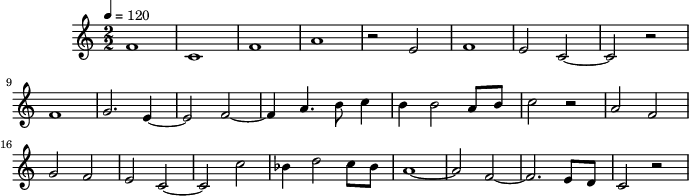

In [43]:
from maelzel.core import *
cantus = Chain([
    Note("4F", 4),
    Note("4C", 4),
    Note("4F", 4),
    Note("4A", 4),
    Rest(2),
    Note("4E", 2, properties={'setdur': 4}),
    Note("4F", 4),
    Note("4E", 2),
    Note("4C", 2),
    Note("4C", 2),
    Rest(2),
    Note("4F", 4, properties={'setdur': 4}),
    Note("4G", 3),
    Note("4E", 1),
    Note("4E", 2),
    Note("4F", 3),
    Note("4A", 1.5),
    Note("4B", 0.5),
    Note("5C", 1),
    Note("4B", 1),
    Note("4B", 2),
    Note("4A", 0.5),
    Note("4B", 0.5),
    Note("5C", 2),
    Rest(2),
    Note("4A", 2),
    Note("4F", 2),
    Note("4G", 2),
    Note("4F", 2),
    Note("4E", 2),
    Note("4C", 4, properties={'setdur': 4}),
    Note("5C", 2),
    Note("4Bb", 1),
    Note("5D", 2),
    Note("5C", 0.5),
    Note("4Bb", 0.5),
    Note("4A", 6),
    Note("4F", 2),
    Note("4F", 3),
    Note("4E", 0.5),
    Note("4D", 0.5),
    Note("4C", 2)
])
cantus


Chain([4F:350Hz:6♩:start=0, 4C:262Hz:6♩:start=6, 4F:350Hz:6♩:start=12, 4A:442Hz:6♩:start=18, Rest(dur=2), 4E:331Hz:4♩:start=26, 4F:350Hz:6♩:start=30, 4E:331Hz:2♩:start=36, 4C:262Hz:2♩:start=38, 4C:262Hz:2♩:start=40, …])
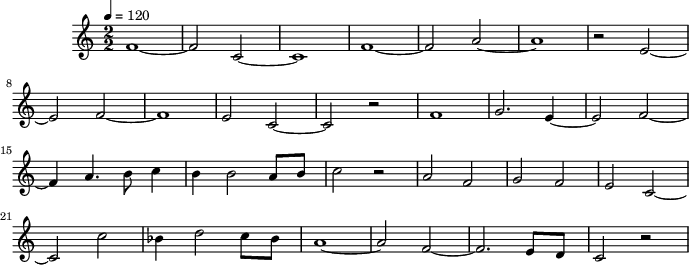

In [44]:
def transf(n):
    setdur = n.properties.get('setdur')
    if setdur:
        return setdur
    if n.dur == 4:
        return n.dur * 1.5
    else:
        return n.dur
    
cantus2 = Chain(n.clone(start=None, dur=transf(n))
                for n in cantus)
cantus2


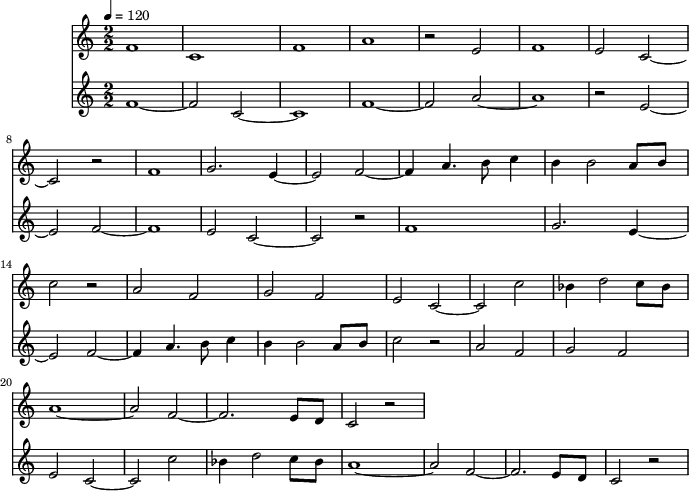

In [45]:
struct = ScoreStruct(timesig=(2, 2), quarterTempo=120)
w = getWorkspace()
w.scorestruct = struct

s = Score([cantus.setPlay(position=0), cantus2.setPlay(position=1)])
s

In [47]:
s.play(instr='.oboe')

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=84)
    Synth(𝍪 preset..oboe:1003.0278, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset..oboe:1003.0279, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)
    Synth(𝍪 preset..oboe:1003.028, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset..oboe:1003.0281, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=69 ...)
    Synth(𝍪 preset..oboe:1003.0282, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=0 ...)
    Synth(𝍪 preset..oboe:1003.0283, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset..oboe:1003.0284, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset..oboe:1003.0285, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset..oboe:1003.0286, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)
    Synth(𝍪 preset..oboe:1003.0287, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)
    Synth(𝍪 preset..oboe:1003.0288, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=0 ...)
    Synth(𝍪 preset..oboe:1003.0289, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset..oboe:1003.029, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=67 ...)
    Synth(𝍪 preset..oboe:1003.0291, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset..oboe:1003.0292, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset..oboe:1003.0293, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset..oboe:1003.0294, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=69 ...)
    Synth(𝍪 preset..oboe:1003.0295, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=71 ...)
    Synth(𝍪 preset..oboe:1003.0296, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=72 ...)
    Synth(𝍪 preset..oboe:1003.0297, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=71 ...)
    Synth(𝍪 preset..oboe:1003.0298, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchi

In [1]:
from maelzel.core import *

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


In [2]:
e = play.getPlayEngine()



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
e.testAudio()

523.0002


Testaudio: pink noise mode
Channel: 1 / 2
Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2


In [4]:
import csoundengine as ce

In [5]:
e = ce.Engine()



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [7]:
e.testAudio()

523.0002


Testaudio: pink noise mode
Channel: 1 / 2
Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2


In [2]:
e = ce.Engine(nchnls=2)



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:

e.testAudio()


Testaudio: pink noise mode
Channel: 1 / 2


523.0002

Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2
